In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# Shuffle the DataFrame
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_shuffled.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,68,5.8,2.7,4.1,1.0,Iris-versicolor
1,129,6.4,2.8,5.6,2.1,Iris-virginica
2,116,6.4,3.2,5.3,2.3,Iris-virginica
3,103,7.1,3.0,5.9,2.1,Iris-virginica
4,70,5.6,2.5,3.9,1.1,Iris-versicolor
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,97,5.7,2.9,4.2,1.3,Iris-versicolor
7,79,6.0,2.9,4.5,1.5,Iris-versicolor
8,46,4.8,3.0,1.4,0.3,Iris-setosa
9,141,6.7,3.1,5.6,2.4,Iris-virginica


In [11]:
# Perform one-hot encoding for 'Species'
df_shuffled['Iris-setosa'] = (df_shuffled['Species'] == 'Iris-setosa').astype(int)
df_shuffled['Iris-virginica'] = (df_shuffled['Species'] == 'Iris-virginica').astype(int)
df_shuffled['Iris-versicolor'] = (df_shuffled['Species'] == 'Iris-versicolor').astype(int)

# Drop the 'Species' column
df_shuffled.drop('Species', axis=1, inplace=True)

In [12]:
df_shuffled.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-virginica,Iris-versicolor
0,68,5.8,2.7,4.1,1.0,0,0,1
1,129,6.4,2.8,5.6,2.1,0,1,0
2,116,6.4,3.2,5.3,2.3,0,1,0
3,103,7.1,3.0,5.9,2.1,0,1,0
4,70,5.6,2.5,3.9,1.1,0,0,1
5,6,5.4,3.9,1.7,0.4,1,0,0
6,97,5.7,2.9,4.2,1.3,0,0,1
7,79,6.0,2.9,4.5,1.5,0,0,1
8,46,4.8,3.0,1.4,0.3,1,0,0
9,141,6.7,3.1,5.6,2.4,0,1,0


In [13]:
# Calculate split indices
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.3)

# Split the dataset
train_set = df_shuffled[:train_size]
test_set = df_shuffled[train_size:train_size + test_size]

In [14]:
train = np.array(train_set)
test = np.array(test_set)

In [15]:
# Split the data into feature vector X and target vector Y
X_train = train[:, 1:5].astype(float)
y_train = train[:, 5:]

X_test = test[:, 1:5].astype(float)
y_test = test[:, 5:]

In [16]:
# Standardize/Normalize the feature vectors
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

X_train_normalised = (X_train - X_mean) / X_std
X_test_normalised = (X_test - X_mean) / X_std


In [17]:
input_size = X_train.shape[1]  # 4
hidden_size = 5  # Can be changed
output_size = y_train.shape[1]  # 3


In [ ]:
# def forward_propagation(X, W1, b1, W2, b2):
#     Z1 = np.dot(X, W1) + b1
#     A1 = np.tanh(Z1)
#     Z2 = np.dot(A1, W2) + b2
#     A2 = sigmoid(Z2)
#     return A1, A2

In [57]:
# Define the MLP model
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs

        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # ReLU function definition
    def relu(self,x):
        return np.maximum(0, x)


    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def unitF(self,x):
      if x>0:
        return 1
      else:
        return 0

    def forward_propagation(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = np.tanh(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.softmax(self.z2)
        return self.a1,self.a2

    def compute_cost(self,y_pred, y):
        loss = -np.sum(y * np.log(y_pred), axis=1)
        # Compute the average cross-entropy loss
        avg_loss = np.mean(loss)
        return avg_loss

    def backward_propagation(self,X, Y, A1, A2, W2):
      m = X.shape[0]
      dZ2 = A2 - Y
      dW2 = np.dot(A1.T, dZ2)/m #hx3 /m
      db2 = np.sum(dZ2, axis=0, keepdims=True)/m
      # Apply the custom function element-wise to the entire array
      vectorized_function = np.vectorize(self.unitF)
      dZ1 = np.dot(dZ2, W2.T) * vectorized_function(self.z1)
      dW1 = np.dot(X.T, dZ1)/m
      db1 = np.sum(dZ1, axis=0, keepdims=True)/m
      return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2):
      self.W1 = self.W1 - self.learning_rate * dW1
      self.b1 = self.b1 - self.learning_rate * db1
      self.W2 = self.W2 - self.learning_rate * dW2
      self.b2 = self.b2 - self.learning_rate * db2
      # return W1, b1, W2, b2

    def fit(self, X_train, y_train):
        Cost_list=[]
        for epoch in range(self.epochs):
            A1, A2 = self.forward_propagation(X_train)
            cost = self.compute_cost(A2, y_train)
            Cost_list.append(cost)
            dW1, db1, dW2, db2 = self.backward_propagation(X_train, y_train,A1,A2,self.W2)
            self.update_parameters(dW1, db1, dW2, db2)
            # if( epoch%100==0):
            #     print(f'Epoch [{epoch}], Cost: {cost:.4f}')
        plt.plot(range(self.epochs),Cost_list)

    def predict(self, X):
        a1,y_pred = self.forward_propagation(X)
        return np.argmax(y_pred, axis=1)


Accuracy: 0.9555555555555556
Precision: 0.9526143790849674
Recall: 0.9526143790849674
F1-score: 0.952020202020202


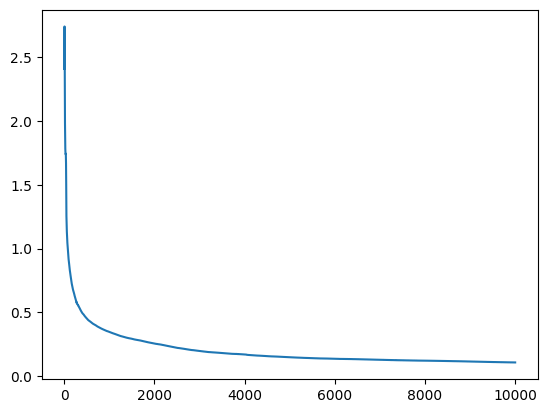

<Figure size 800x600 with 0 Axes>

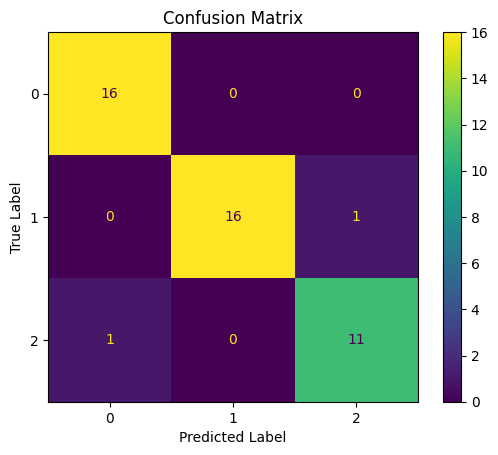

In [58]:
# Train the MLP model
mlp = MLP(input_size=4, hidden_size=6, output_size=3)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(np.argmax(y_test, axis=1), y_pred))
print('Precision:', precision_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('Recall:', recall_score(np.argmax(y_test, axis=1), y_pred, average='macro'))
print('F1-score:', f1_score(np.argmax(y_test, axis=1), y_pred, average='macro'))

# Calculate the confusion matrix
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()